In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from Bio import SeqIO
import re
import coralme
plt.rcParams['svg.fonttype'] = 'none'
pandas.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2


In [2]:
Errors = {
    "ribo" :{
        "me" : pandas.read_csv("./datasets/omics/riboseq-memodel-errors.csv",index_col=0)["0"],
        "m" : pandas.read_csv("./datasets/omics/riboseq-mmodel-errors.csv",index_col=0)["0"]
    },
    "rna" :{
        "me" : pandas.read_csv("./datasets/omics/rnaseq-memodel-errors.csv",index_col=0)["0"],
        "m" : pandas.read_csv("./datasets/omics/rnaseq-mmodel-errors.csv",index_col=0)["0"]
    }
}
for i,d in Errors.items():
    Errors[i] = pandas.DataFrame.from_dict(d)

In [3]:
Errors["ribo"][Errors["ribo"].index.str.contains("tRNA")]

,me,m
Metabolic:S_tRNA_Charging,-0.116734,-0.798466
tRNA Charging,-0.192224,NaN


In [4]:
def simplify(s):
    s = s.split("__")[-1]
    s = s.replace("S_","")
    s = s.replace("_"," ")
    s = s.replace("Metabolic:","")
    return s

/tmp/ipykernel_598025/1372514878.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu').copy()
/home/jt/venvs/coralme/lib/python3.10/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


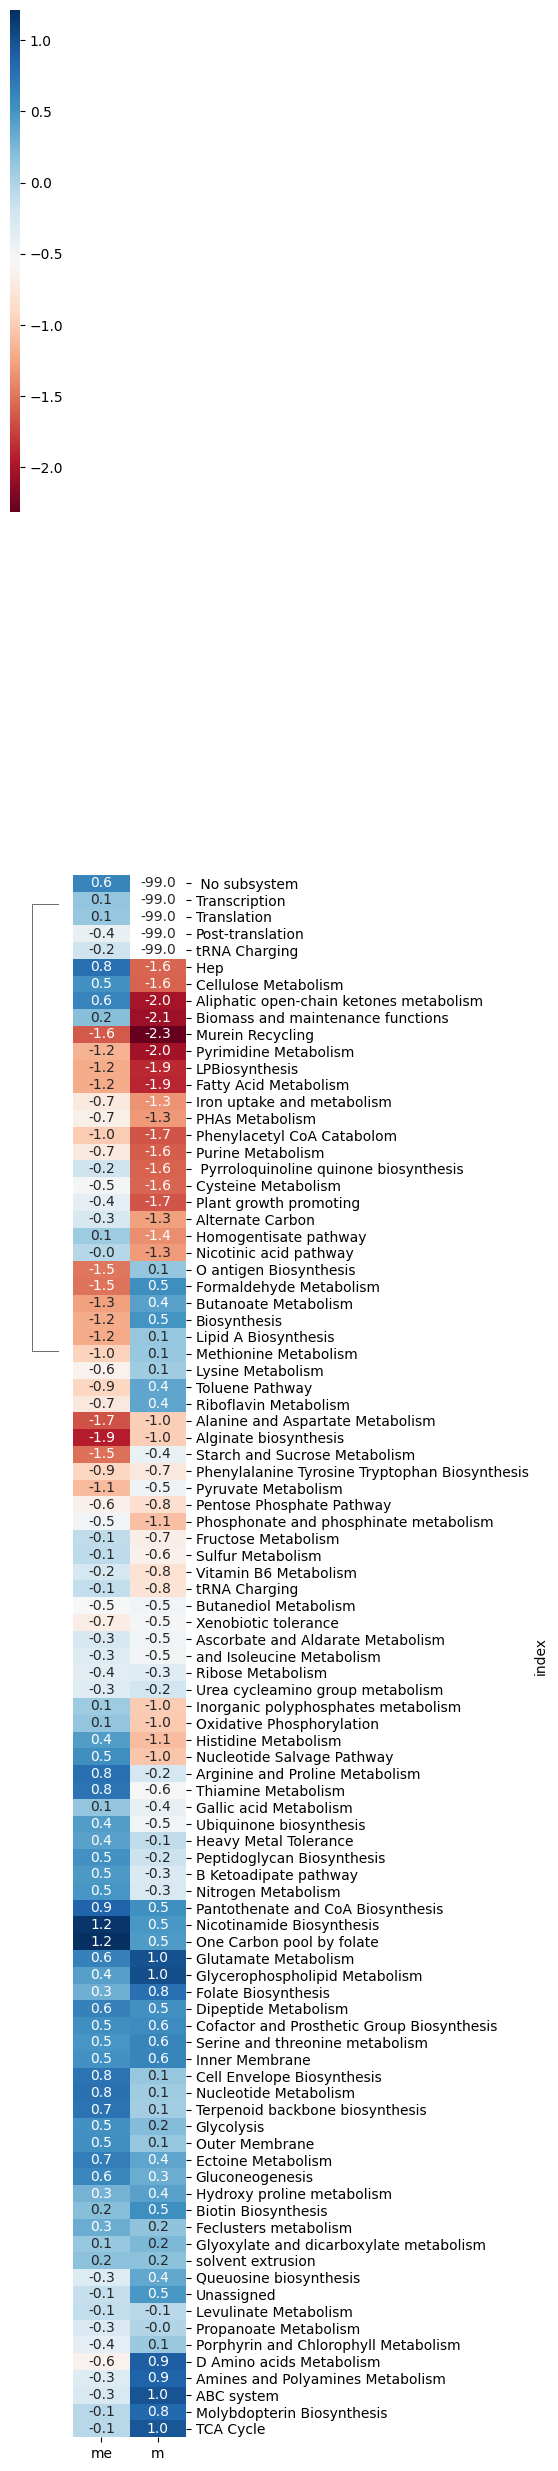

In [5]:
import seaborn as sns
cmap_df = Errors["ribo"].fillna(-99)
cmap_df.index = cmap_df.reset_index()["index"].apply(lambda x:simplify(x))

cmap = plt.cm.get_cmap('RdBu').copy()
cmap.set_under('white')
cmap = sns.clustermap(cmap_df,
               row_cluster=True,
               col_cluster=False,
               vmin=Errors["ribo"].min().min(),
               # vmax=vmax,
               annot=True,
               fmt=".1f",
               cmap=cmap,
               # annot_kws={'rotation': 90}
               figsize=(1.0*cmap_df.shape[1],(0.3)*cmap_df.shape[0]),
               # cbar=False,
              )
plt.savefig("./figures/performance-errors-clustergram.svg",format="svg")